In [1]:
# import os
# os.environ["CALITP_BQ_MAX_BYTES"] = str(800_000_000_000) 

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(
/tmp/ipykernel_438/3465571729.py:2: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should be smooth. However, if you are using PyGEOS directly (calling P

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
import json

In [1]:
from calitp_data_analysis import utils

In [5]:
local_path = "/home/jovyan/data-analyses/project_prioritization/accessibility/santacruz_modifications"

In [6]:
GCS_PATH = "gs://calitp-analytics-data/data-analyses/project_prioritization/SantaCruz_Watsonville_Project_SHP_files"

In [7]:
file = (pd.read_json("santacruz_auxiliary_lane.geojson"))

In [8]:
file

,type,features
0,FeatureCollection,"{'geometry': {'type': 'MultiLineString', 'coor..."


In [33]:
# import json
# with open('project_location.json') as json_file: 
#     data = json.load(json_file) 
# print(data['polygons'][0]['geometry']['coordinates'][0])

In [ ]:
#### Reading in json using pandas

In [37]:
## error reading due to len of arrays not matching
line = pd.read_json("project_location.json")

ValueError: All arrays must be of the same length

In [15]:
input_file=json.load(open("project_location.json", "r", encoding="utf-8"))

In [16]:
input_file

{'description': '',
 'name': 'East_Bay_Greenway2',
 'allowedModes': ['BICYCLE', 'WALK', 'CAR'],
 'bikeTimeFactor': 1,
 'bikeLts': 1,
 'carSpeedKph': 64,
 'lineStrings': [[[-122.264614, 37.798344],
   [-122.253103, 37.790666],
   [-122.236232, 37.782242],
   [-122.226696, 37.776169],
   [-122.226997, 37.775288],
   [-122.216908, 37.770577],
   [-122.207489, 37.762719],
   [-122.195695, 37.752455],
   [-122.189072, 37.747044]],
  [[-122.188866, 37.747123],
   [-122.166714, 37.72922],
   [-122.161212, 37.723988],
   [-122.158006, 37.718641],
   [-122.150451, 37.713519],
   [-122.145514, 37.713248],
   [-122.142809, 37.715351],
   [-122.130088, 37.706307],
   [-122.119125, 37.698943],
   [-122.106279, 37.689975],
   [-122.084974, 37.673342],
   [-122.08177, 37.670128]]],
 'walkTimeFactor': 1}

In [21]:
data = pd.json_normalize(input_file, max_level=0)

In [22]:
data.sample()

,description,name,allowedModes,bikeTimeFactor,bikeLts,carSpeedKph,lineStrings,walkTimeFactor
0,,East_Bay_Greenway2,"[BICYCLE, WALK, CAR]",1,1,64,"[[[-122.264614, 37.798344], [-122.253103, 37.7...",1


In [24]:
from siuba import *

In [25]:
data = data>>select(_.name, _.lineStrings)

In [26]:
data

,name,lineStrings
0,East_Bay_Greenway2,"[[[-122.264614, 37.798344], [-122.253103, 37.7..."


In [38]:
### Putting into a geodataframe
geo_data = gpd.GeoDataFrame(data, geometry='lineStrings')

TypeError: Input must be valid geometry objects: [[[-122.264614, 37.798344], [-122.253103, 37.790666], [-122.236232, 37.782242], [-122.226696, 37.776169], [-122.226997, 37.775288], [-122.216908, 37.770577], [-122.207489, 37.762719], [-122.195695, 37.752455], [-122.189072, 37.747044]], [[-122.188866, 37.747123], [-122.166714, 37.72922], [-122.161212, 37.723988], [-122.158006, 37.718641], [-122.150451, 37.713519], [-122.145514, 37.713248], [-122.142809, 37.715351], [-122.130088, 37.706307], [-122.119125, 37.698943], [-122.106279, 37.689975], [-122.084974, 37.673342], [-122.08177, 37.670128]]]

In [27]:
result = data.to_json(orient="index")

In [28]:
result

'{"0":{"name":"East_Bay_Greenway2","lineStrings":[[[-122.264614,37.798344],[-122.253103,37.790666],[-122.236232,37.782242],[-122.226696,37.776169],[-122.226997,37.775288],[-122.216908,37.770577],[-122.207489,37.762719],[-122.195695,37.752455],[-122.189072,37.747044]],[[-122.188866,37.747123],[-122.166714,37.72922],[-122.161212,37.723988],[-122.158006,37.718641],[-122.150451,37.713519],[-122.145514,37.713248],[-122.142809,37.715351],[-122.130088,37.706307],[-122.119125,37.698943],[-122.106279,37.689975],[-122.084974,37.673342],[-122.08177,37.670128]]]}}'

#### Project to Shape file

In [ ]:
multimodal_street = gpd.read_file('santacruz_multimodal_street.geojson')

In [ ]:
multimodal_street

,geometry
0,"POLYGON ((-121.87154 36.97216, -121.87173 36.9..."


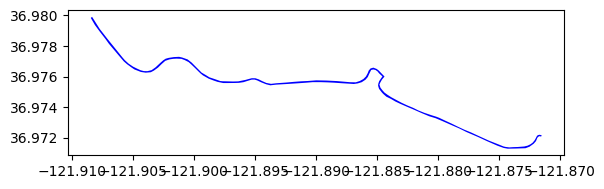

In [ ]:
ax = multimodal_street.plot(color='blue')

In [ ]:
# multimodal_street.to_file('sc_multimodal_street.shp')  

In [ ]:
utils.make_zipped_shapefile(multimodal_street,
                             "sc_multimodal_street.zip", 
                            # gcs_folder = f"{GCS_PATH}/"
                           )

Path name: sc_multimodal_street.zip
Dirname (1st element of path): sc_multimodal_street
Shapefile name: sc_multimodal_street.shp
Shapefile component parts folder: sc_multimodal_street/sc_multimodal_street.shp


In [ ]:
bikeped_overcrossing = gpd.read_file('santacruz_bikeped_overcrossing.geojson')

In [ ]:
bikeped_overcrossing

,geometry
0,"MULTILINESTRING ((-121.91180 36.97533, -121.90..."


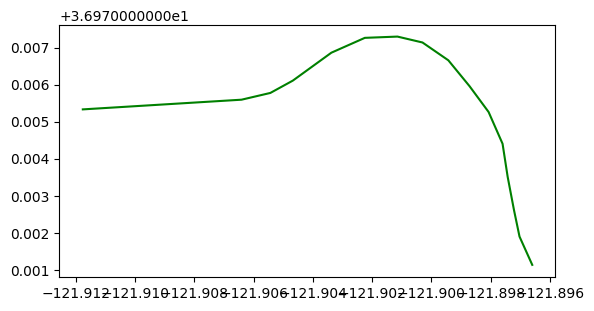

In [ ]:
ax2 = bikeped_overcrossing.plot(color="green")

In [ ]:
# bikeped_overcrossing.to_file('sc_bikeped_overcrossing.shp')  

In [ ]:
utils.make_zipped_shapefile(bikeped_overcrossing,
                             "sc_bikeped_overcrossing.zip", 
                            # gcs_folder = f"{GCS_PATH}/"
                           )

Path name: sc_bikeped_overcrossing.zip
Dirname (1st element of path): sc_bikeped_overcrossing
Shapefile name: sc_bikeped_overcrossing.shp
Shapefile component parts folder: sc_bikeped_overcrossing/sc_bikeped_overcrossing.shp


In [ ]:
auxiliary_lane = gpd.read_file('santacruz_auxiliary_lane.geojson')

In [ ]:
auxiliary_lane

,geometry
0,"MULTILINESTRING ((-121.88405 36.97408, -121.88..."


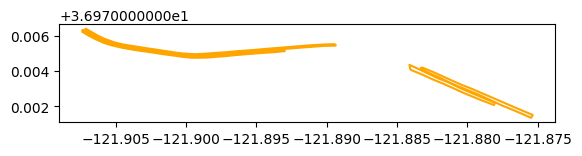

In [ ]:
ax3 = auxiliary_lane.plot(color="orange")

In [ ]:
# proj3.to_file('sc_auxiliary_lane.shp')  

In [ ]:
utils.make_zipped_shapefile(auxiliary_lane,
                             "sc_auxiliary_lane.zip", 
                            # gcs_folder = f"{GCS_PATH}/"
                           )

Path name: sc_auxiliary_lane.zip
Dirname (1st element of path): sc_auxiliary_lane
Shapefile name: sc_auxiliary_lane.shp
Shapefile component parts folder: sc_auxiliary_lane/sc_auxiliary_lane.shp


In [ ]:
bus_on_shoulder = gpd.read_file('santacruz_bus_on_shoulder.geojson')

In [ ]:
bus_on_shoulder

,geometry
0,"MULTILINESTRING ((-121.89204 36.97521, -121.89..."


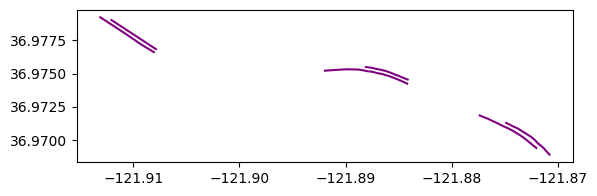

In [ ]:
ax4 = bus_on_shoulder.plot(color="purple")

In [ ]:
# bus_on_shoulder.to_file('sc_bus_on_shoulder.shp')  

In [ ]:
utils.make_zipped_shapefile(bus_on_shoulder,
                             "sc_bus_on_shoulder.zip", 
                            # gcs_folder = f"{GCS_PATH}/"
                           )

Path name: sc_bus_on_shoulder.zip
Dirname (1st element of path): sc_bus_on_shoulder
Shapefile name: sc_bus_on_shoulder.shp
Shapefile component parts folder: sc_bus_on_shoulder/sc_bus_on_shoulder.shp


#### Concat Project locations

**issue:** zipping combined projects returns folder containing individual shapefiles. Different types of strings is determining factor

In [ ]:
#### for bike ped
proj_bike_ped = gpd.GeoDataFrame(pd.concat([multimodal_street, bikeped_overcrossing]))

<AxesSubplot:>

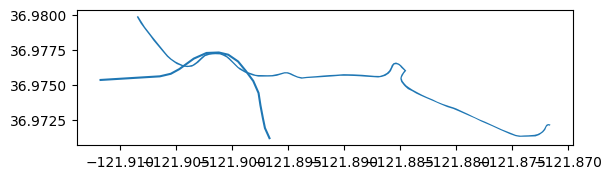

In [ ]:
proj_bike_ped.plot()

In [ ]:
# proj_bike_ped.to_file('sc_proj_bike_ped.shp')  

In [ ]:
# utils.make_zipped_shapefile(proj_bike_ped,
#                              "sc_proj_bike_ped.zip", 
#                             # gcs_folder = f"{GCS_PATH}/"
#                            )

In [ ]:
## for car 

proj_car = gpd.GeoDataFrame(pd.concat([multimodal_street, auxiliary_lane]))

<AxesSubplot:>

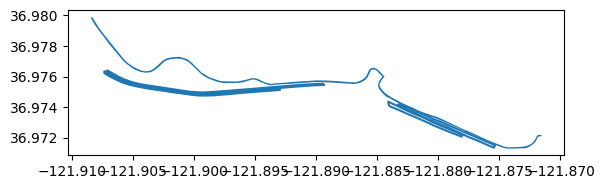

In [ ]:
proj_car.plot()

In [ ]:
# proj_car.to_file('sc_proj_car.shp')  

In [ ]:
# utils.make_zipped_shapefile(proj_car,
#                              "sc_proj_car.zip", 
#                             # gcs_folder = f"{GCS_PATH}/"
#                            )

In [ ]:
## for transit

proj_transit = gpd.GeoDataFrame(pd.concat([multimodal_street, bus_on_shoulder]))

<AxesSubplot:>

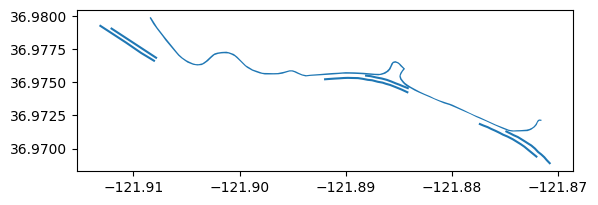

In [ ]:
proj_transit.plot()

In [ ]:
# proj_transit.to_file('sc_proj_transit.shp')  

In [ ]:
# utils.make_zipped_shapefile(proj_transit,
#                              "sc_proj_transit.zip", 
#                             # gcs_folder = f"{GCS_PATH}/"
#                            )

### Get Routes from GTFS Data

In [ ]:
from shared_utils import gtfs_utils_v2
# from shared_utils import gtfs_utils
from calitp_data_analysis import geography_utils
import datetime
from siuba import *

In [ ]:
analysis_date = datetime.date(2022, 11, 28)

In [ ]:
FEED = '02fbd8719f99b906e65b2cf86cbb7cae'


In [ ]:
keep_shape_cols = [
       "feed_key", "activity_date", 
       "shape_id", "shape_array_key",
       "n_trips"]

In [ ]:
test_feed_keys = [
    "02fbd8719f99b906e65b2cf86cbb7cae", # Santa Cruz Schedule
]
test_cases = [
    "Santa Cruz", 
]

In [ ]:
shapes = gtfs_utils_v2.get_shapes(
    selected_date = analysis_date,
    operator_feeds = test_feed_keys,
    shape_cols = ["feed_key", "shape_id", "shape_array_key",
                 "n_trips"],
    get_df = True,
    crs = "EPSG:3310",
)

/opt/conda/lib/python3.9/site-packages/sqlalchemy_bigquery/_types.py:101: SAWarning: Did not recognize type 'GEOGRAPHY' of column 'pt_array'


In [ ]:
shapes

,feed_key,shape_id,shape_array_key,n_trips,geometry
0,02fbd8719f99b906e65b2cf86cbb7cae,350073,6b6b5e540abfd7c534ea2aab75117f87,1,"LINESTRING (-185470.812 -95192.760, -185479.31..."
1,02fbd8719f99b906e65b2cf86cbb7cae,660010,4ab6871d6667b6b81e3689e60f34fd18,1,"LINESTRING (-179972.670 -114317.287, -179934.5..."
2,02fbd8719f99b906e65b2cf86cbb7cae,350084,5d133e126244f825379bb0b6d9ff1b10,1,"LINESTRING (-188298.722 -96873.513, -188301.96..."
3,02fbd8719f99b906e65b2cf86cbb7cae,350071,4a16ac936ef04254c3c8d32b520fb82d,1,"LINESTRING (-190183.875 -89076.487, -190184.09..."
4,02fbd8719f99b906e65b2cf86cbb7cae,350067,995941e075ee891a866bd7d69f5cf880,1,"LINESTRING (-184682.089 -104159.840, -184682.6..."
5,02fbd8719f99b906e65b2cf86cbb7cae,660011,83ac025461fa9e3d70693faa7a13854c,1,"LINESTRING (-174775.662 -113900.251, -174774.2..."
6,02fbd8719f99b906e65b2cf86cbb7cae,74S0003,ab8ee62afdc185dc11a5df12edc005d0,1,"LINESTRING (-156602.745 -121551.079, -156584.8..."
7,02fbd8719f99b906e65b2cf86cbb7cae,350034,34322dc04ea0f4aa70aaaf5059c519bf,1,"LINESTRING (-188298.722 -96873.513, -188301.96..."
8,02fbd8719f99b906e65b2cf86cbb7cae,350087,3f6a5124f4180eb7f31cc7f1af7634d6,1,"LINESTRING (-190183.875 -89076.487, -190184.09..."
9,02fbd8719f99b906e65b2cf86cbb7cae,350066,d9b6ee346d02334b957aea08689ec7a4,1,"LINESTRING (-184682.089 -104159.840, -184682.6..."


<AxesSubplot:>

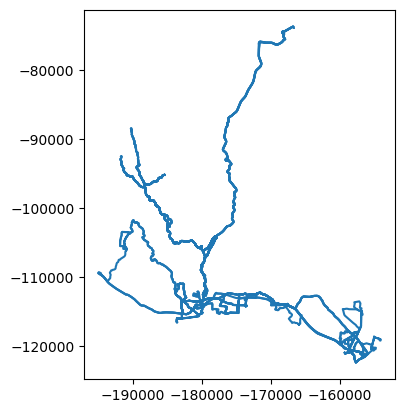

In [ ]:
shapes.plot()

In [59]:
import siuba
from calitp_data_analysis.tables import tbls
from typing import Literal, Union


In [60]:
def subset_cols(cols: list) -> siuba.dply.verbs.Pipeable:
    """
    Select subset of columns, if column list is present.
    Otherwise, skip.
    """
    if cols:
        return select(*cols)
    elif not cols or len(cols) == 0:
        # Can't use select(), because we'll select no columns
        # But, without knowing full list of columns, let's just
        # filter out nothing
        return filter()
def filter_date(
    selected_date: Union[str, datetime.date], date_col: Literal["service_date", "activity_date"]
) -> siuba.dply.verbs.Pipeable:
    return filter(_[date_col] == selected_date)

def filter_operator(operator_feeds: list, include_name: bool = False) -> siuba.dply.verbs.Pipeable:
    """
    Filter if operator_list is present.
    For trips table, operator_feeds can be a list of names or feed_keys.
    For stops, shapes, stop_times, operator_feeds can only be a list of feed_keys.
    """
    # in testing, using _.feed_key or _.name came up with a
    # siuba verb not implemented
    # https://github.com/machow/siuba/issues/407
    # put brackets around should work
    if include_name:
        return filter(_["feed_key"].isin(operator_feeds) | _["name"].isin(operator_feeds))
    else:
        return filter(_["feed_key"].isin(operator_feeds))


In [61]:
##### TRIPS

keep_trip_cols = [
            "feed_key", "name", "regional_feed_type", 
            "service_date", "trip_key", "trip_id",
            "route_key", "route_id", "route_type", 
            "route_short_name", "route_long_name", "route_desc",
            "direction_id", 
            "shape_array_key", "shape_id",
            "trip_first_departure_sec", "trip_last_arrival_sec",
            "service_hours"]

In [62]:
trips = (
        tbls.mart_gtfs.fct_daily_scheduled_trips()
        >> filter_date(analysis_date, date_col="service_date")
        >> filter_operator(test_feed_keys, include_name=True)
)

trips = trips >> subset_cols(keep_trip_cols) >> collect()


In [63]:
trips.head()

,feed_key,name,regional_feed_type,service_date,trip_key,trip_id,route_key,route_id,route_type,route_short_name,route_long_name,route_desc,direction_id,shape_array_key,shape_id,trip_first_departure_sec,trip_last_arrival_sec,service_hours
0,02fbd8719f99b906e65b2cf86cbb7cae,Santa Cruz Schedule,None,2022-11-28,6167e9d932d9f5a879e444259651b435,3802759-202310S-vs20231S-Weekday-04,4a887925f8478d1af869bc42941476dd,15,3,15,UCSC via Main Gate - Laurel,None,0,74a5df527cef86fcf8ade1542aabc087,150010,76500,78720,0.616667
1,02fbd8719f99b906e65b2cf86cbb7cae,Santa Cruz Schedule,None,2022-11-28,8cd1f350cf263566a7df0e71abb5a553,3802527-202310S-vs20231S-Weekday-04,85edfcd275ffa87af6e1bfa570f52451,68,3,68,Broadway/Portola,None,0,0c9d3e815dee0c035ca47ffc1cfb1d95,680013,36900,38280,0.383333
2,02fbd8719f99b906e65b2cf86cbb7cae,Santa Cruz Schedule,None,2022-11-28,da1631559c2d72bd2ff7386b69e97ef5,3802584-202310S-vs20231S-Weekday-04,ce261da1009b3a483a263263677c1b31,72,3,72,Green Valley - Hospital,None,0,7de23b8696b2d376937b034c281f785a,720004,38700,41940,0.900000
3,02fbd8719f99b906e65b2cf86cbb7cae,Santa Cruz Schedule,None,2022-11-28,06aa47879ff4d2c80c75db8f9d3af97d,3802690-202310S-vs20231S-Weekday-04,fb29236ea16de26b5ce849c9e8c70103,18,3,18,UCSC via Main Gate - Mission,None,0,5f0d8f26b2a157bf88248bdcbaad4d23,180004,41100,44520,0.950000
4,02fbd8719f99b906e65b2cf86cbb7cae,Santa Cruz Schedule,None,2022-11-28,7e86b6ef5879b5a9a840b4cdb98027c7,3802530-202310S-vs20231S-Weekday-04,85edfcd275ffa87af6e1bfa570f52451,68,3,68,Broadway/Portola,None,0,0c9d3e815dee0c035ca47ffc1cfb1d95,680013,26100,27300,0.333333


In [64]:
len(trips)

526

In [65]:
(shapes.merge(trips, how="outer", indicator=True))._merge.value_counts()

both          526
left_only       0
right_only      0
Name: _merge, dtype: int64

In [66]:
df = shapes.merge(trips, how="outer", indicator=True)

In [67]:
df.columns

Index(['feed_key', 'shape_id', 'shape_array_key', 'n_trips', 'geometry',
       'name', 'regional_feed_type', 'service_date', 'trip_key', 'trip_id',
       'route_key', 'route_id', 'route_type', 'route_short_name',
       'route_long_name', 'route_desc', 'direction_id',
       'trip_first_departure_sec', 'trip_last_arrival_sec', 'service_hours',
       '_merge'],
      dtype='object')

In [68]:
df.sample(5)

,feed_key,shape_id,shape_array_key,n_trips,geometry,name,regional_feed_type,service_date,trip_key,trip_id,route_key,route_id,route_type,route_short_name,route_long_name,route_desc,direction_id,trip_first_departure_sec,trip_last_arrival_sec,service_hours,_merge
170,02fbd8719f99b906e65b2cf86cbb7cae,69A0006,9c7b0cbce320ff6a7a20f1fafd184577,12,"LINESTRING (-156600.649 -121553.231, -156631.1...",Santa Cruz Schedule,None,2022-11-28,4f33cfbf61705c17783f9d6486ae8824,3802377-202310S-vs20231S-Weekday-04,79cb7673f482127f0c7a21f643e3a296,69A,3,69A,Capitola/Airport,None,1,58800,61980,0.883333,both
374,02fbd8719f99b906e65b2cf86cbb7cae,69W0006,e7e5eb37c35d550e6ed98214e6cb6894,16,"LINESTRING (-156600.649 -121553.231, -156631.1...",Santa Cruz Schedule,None,2022-11-28,bb11591357c432b8c0ce914a996e0c70,3802381-202310S-vs20231S-Weekday-04,b9a2dcc2c127e4c52785b6beb2d7e315,69W,3,69W,Capitola/Cabrillo,None,1,71400,74100,0.750000,both
49,02fbd8719f99b906e65b2cf86cbb7cae,170063,2dff360188693fb293a2491a39d2de00,4,"LINESTRING (-179979.207 -114286.129, -179977.4...",Santa Cruz Schedule,None,2022-11-28,898c9cadd51cf248db05ce36b61fc2a0,3802426-202310S-vs20231S-Weekday-04,c82a6a45c866193dff5be6639c3b2d86,17,3,17,Amtrak Highway 17 Express,None,0,42720,45900,0.883333,both
263,02fbd8719f99b906e65b2cf86cbb7cae,750008,31394f3b4ad6570c0c6c9f527f4302a4,14,"LINESTRING (-156602.745 -121551.079, -156584.8...",Santa Cruz Schedule,None,2022-11-28,a6e7623f0164ec45d2baf36ce4a4ab48,3802585-202310S-vs20231S-Weekday-04,b42dbffeaf2dbfe4f567881e6bd3663d,75,3,75,Green Valley - Wheelock,None,0,44100,45900,0.500000,both
524,02fbd8719f99b906e65b2cf86cbb7cae,180004,5f0d8f26b2a157bf88248bdcbaad4d23,39,"LINESTRING (-179978.136 -114285.929, -179989.7...",Santa Cruz Schedule,None,2022-11-28,c28ace2804e5c7abf9e7f3a53f4a03e0,3802766-202310S-vs20231S-Weekday-04,fb29236ea16de26b5ce849c9e8c70103,18,3,18,UCSC via Main Gate - Mission,None,0,82500,84780,0.633333,both


In [69]:
routes_to_keep = ['69A', '69W', '71', '91X']

In [70]:
df = df>>filter(_["route_short_name"].isin(routes_to_keep))

In [71]:
df.sample()

,feed_key,shape_id,shape_array_key,n_trips,geometry,name,regional_feed_type,service_date,trip_key,trip_id,route_key,route_id,route_type,route_short_name,route_long_name,route_desc,direction_id,trip_first_departure_sec,trip_last_arrival_sec,service_hours,_merge
187,02fbd8719f99b906e65b2cf86cbb7cae,69A0005,eabe33987121e3333bf22b231dcbaa65,12,"LINESTRING (-179972.670 -114317.287, -179934.5...",Santa Cruz Schedule,None,2022-11-28,71927aa5ccc4750a3db991d7e56fac8d,3802369-202310S-vs20231S-Weekday-04,79cb7673f482127f0c7a21f643e3a296,69A,3,69A,Capitola/Airport,None,0,36420,39480,0.85,both


<AxesSubplot:>

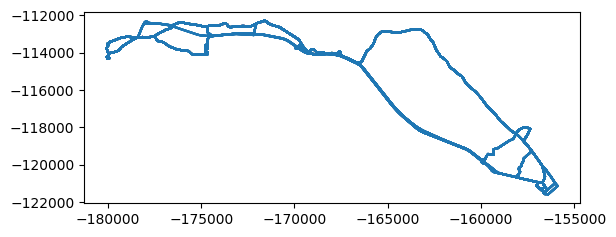

In [72]:
df.plot()

In [73]:
gdf = df>>select(_.shape_id, _.geometry)

In [74]:
gdf2 =  gpd.GeoDataFrame(gdf)

In [ ]:
# gdf2.to_file('transit_route.shp')  

In [77]:
utils.make_zipped_shapefile(gdf2,
                             "transit_route.zip", 
                            # gcs_fol/der = f"{GCS_PATH}/"
                           )

Path name: transit_route.zip
Dirname (1st element of path): transit_route
Shapefile name: transit_route.shp
Shapefile component parts folder: transit_route/transit_route.shp
